This script documents the visualisations made for the report. It is not particularly well structured, and was more for my personal use and understanding. In many cases, I have changed the variable and saved the plot within the same cell, so not all plots may appear here. Please see the report for better clarification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fwd_predictions= pd.read_csv('fwd_predictions.csv')
mid_predictions = pd.read_csv('mid_predictions.csv')
def_predictions = pd.read_csv('def_predictions.csv')
gk_predictions = pd.read_csv('gk_predictions.csv')

In [3]:
all_predictions = pd.read_csv('all_predictions.csv')

In [38]:
def_sep = gk_predictions.sort_values('predicted', ascending = False)
def_all = all_predictions[all_predictions.position == 'GK'].sort_values('predicted', ascending = False)
def_sep['rounded points'] = def_sep.predicted.round(1)
def_all['rounded points'] = def_all.predicted.round(1)
df_sep = def_sep.groupby('rounded points').count()
df_all = def_all.groupby('rounded points').count()

Text(0, 0.5, 'number of times predicted')

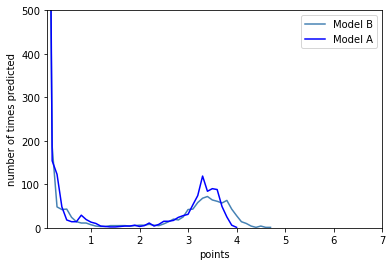

In [39]:
plt.plot(df_sep.index, df_sep['predicted'], color = 'steelblue', label = 'Model B')
plt.plot(df_all.index, df_all['predicted'], color = 'b', label = 'Model A')
plt.xlim([0.1, 7])
plt.ylim([0, 500])
plt.legend()
plt.xlabel('points')
plt.ylabel('number of times predicted')

In [41]:
sep_preds = pd.concat([fwd_predictions, mid_predictions, def_predictions, gk_predictions])
sep_preds = sep_preds.sort_values(['full_name', 'GW'])
all_predictions = all_predictions.sort_values(['full_name','GW'])

Text(0, 0.5, 'Predicted Points')

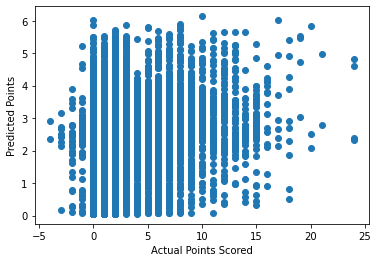

In [42]:
plt.scatter(all_predictions.actual, all_predictions.predicted, marker = 'o')
plt.xlabel('Actual Points Scored')
plt.ylabel('Predicted Points')

In [43]:
count_actuals = all_predictions.groupby('actual').count()
count_preds = all_predictions
count_preds['rounded'] = count_preds.predicted.round()
count_preds = count_preds.groupby('rounded').count()

In [44]:
count_preds_sep = sep_preds
count_preds_sep['rounded'] =count_preds_sep.predicted.round()
count_preds_sep = count_preds_sep.groupby('rounded').count()

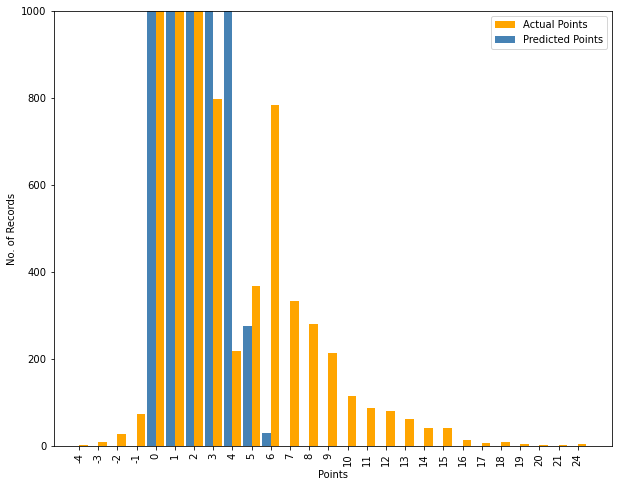

In [60]:
import numpy as np

fig, ax = plt.subplots(figsize = (10,8))

index = np.arange(len(count_actuals.index))
index1 = np.arange(len(count_preds.index))
bar_width = 0.45
opacity = 0.8

ax.bar(index, count_actuals.predicted, color='orange', align='edge', width=bar_width, label = 'Actual Points')
ax.bar(index1+4, count_preds.actual, color='steelblue', align='edge', width=-bar_width,label = 'Predicted Points')

# Assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(count_actuals.index, rotation=90)

plt.xlabel('Points')
plt.ylabel('No. of Records')
plt.ylim([0, 
          1000])
plt.legend()
plt.show()

In [50]:
11586/count_preds_sep.value.sum()

0.45598016450863865

In [64]:
11664/count_preds.value.sum()

0.4590499429336062

In [55]:
15434/count_actuals.value.sum()

0.6074225668070369

In [81]:
#copied from https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
HTML('<style>{}</style>'.format(CSS))
#copied

df1 = all_predictions[all_predictions.position == 'FWD'].groupby('full_name').sum().sort_values('actual', ascending =False).head(10)[['actual','predicted']]
df2 = all_predictions[all_predictions.position == 'FWD'].groupby('full_name').sum().sort_values('predicted', ascending =False).head(10)[['actual','predicted']]
df3 = sep_preds[sep_preds.position == 'FWD'].groupby('full_name').sum().sort_values('predicted', ascending =False).head(10)[['actual','predicted']]

display_side_by_side(df1,df2,df3, titles=['Actual','Model A','Model B']) #we left 3rd empty...

,actual,predicted
full_name,,
harry_kane,192,194.241626
cristiano_ronaldo_dos_santos_aveiro,159,157.050197
teemu_pukki,142,119.103067
michail_antonio,140,140.372791
ivan_toney,139,130.549183
emmanuel_dennis,134,105.530258
jamie_vardy,133,127.943497
ollie_watkins,131,133.334751
richarlison_de_andrade,125,119.436794


In [ ]:
#gk model a: 7/10, model b: 6/10
#def model a: 9/10 model b: 9/10 (rj and dias were drawn on points)
#mid model a: 7/10 7/10
#fwd 8/10 8/10

# Entire Result Visuals

In [101]:
#triple cap
models = ['Model A (Optimal)','Model A (Cheapest)', 'Model B (Optimal)', 'Model B (Cheapest)']
tc = [8, 17,13, 13] 
bb = [13, 13,11, 8]

old_fh_18 = [43, 39, 51, 45]
old_fh_30 = [5, 13, 17, 8]

new_fh_18 = [87, 70, 68, 59]
new_fh_30 =[60, 58, 61, 60]


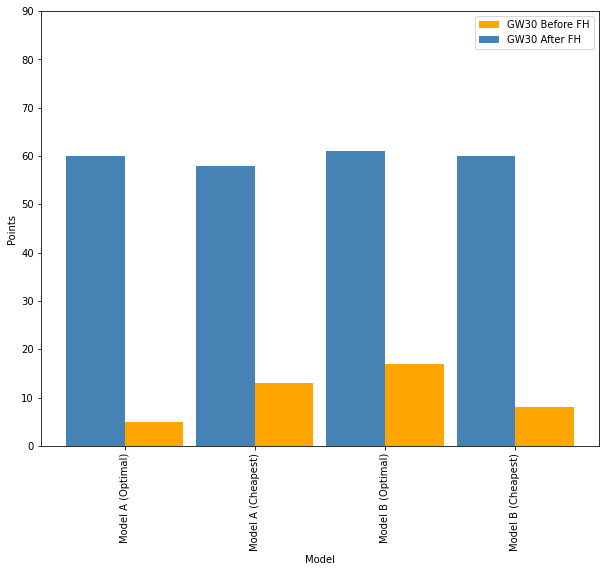

In [106]:
#replace inputs to plot with variables above ^^

import numpy as np

fig, ax = plt.subplots(figsize = (10,8))
index = [1,2,3,4]
bar_width = 0.45
opacity = 0.8

ax.bar(index,old_fh_30, color='orange', align='edge', width=bar_width, label = 'GW30 Before FH')
ax.bar(index, new_fh_30, color='steelblue', align='edge', width=-bar_width,label = 'GW30 After FH')

# Assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=90)

plt.xlabel('Model')
plt.ylabel('Points')
plt.ylim([0, 
          90])
plt.legend()
plt.show()

In [100]:
all_predictions.sort_values('total_points')[['full_name','GW','total_points']].tail(25)

,full_name,GW,total_points
22025,cristiano_ronaldo_dos_santos_aveiro,29,17
5589,mohamed_salah,1,17
4159,joão_pedro_cavaco_cancelo,18,18
10439,matt_doherty,27,18
5614,mohamed_salah,26,18
5578,kevin_de_bruyne,28,18
1749,reece_james,2,18
18813,ferran_torres,3,18
1773,reece_james,28,18
19732,phil_foden,9,18


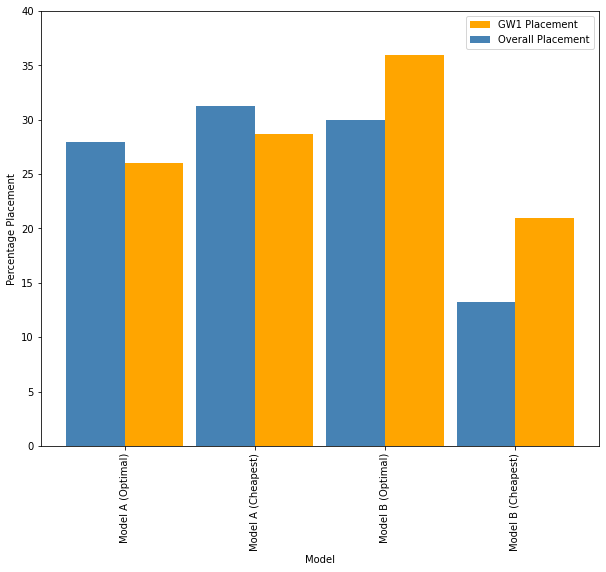

In [110]:
init_placement = [26, 28.7, 36.0, 21.0]
final_placement = [28, 31.3, 30, 13.2]


import numpy as np

fig, ax = plt.subplots(figsize = (10,8))
index = [1,2,3,4]
bar_width = 0.45
opacity = 0.8

ax.bar(index,init_placement, color='orange', align='edge', width=bar_width, label = 'GW1 Placement')
ax.bar(index, final_placement, color='steelblue', align='edge', width=-bar_width,label = 'Overall Placement')

# Assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=90)

plt.xlabel('Model')
plt.ylabel('Percentage Placement')
plt.ylim([0, 
          40])
plt.legend()
plt.show()


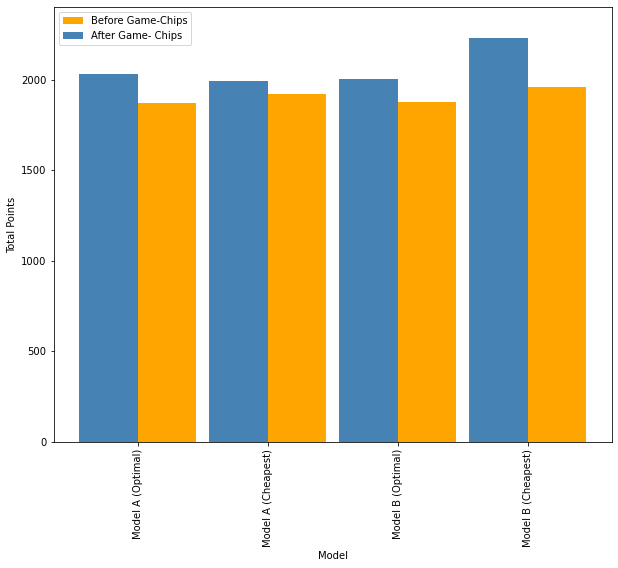

In [114]:
after_gc = [2029,1990,2005,2231]
before_gc = [1868,1921,1874,1960]

fig, ax = plt.subplots(figsize = (10,8))
index = [1,2,3,4]
bar_width = 0.45
opacity = 0.8

ax.bar(index,before_gc, color='orange', align='edge', width=bar_width, label = 'Before Game-Chips')
ax.bar(index, after_gc, color='steelblue', align='edge', width=-bar_width,label = 'After Game- Chips')

# Assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=90)

plt.xlabel('Model')
plt.ylabel('Total Points')
plt.ylim([0, 
          2400])
plt.legend()
plt.show()

In [117]:
all_predictions[all_predictions.GW == 1].groupby('player_team_name').sum().predicted

player_team_name
Arsenal                     47.362078
Aston Villa                 46.016862
Brentford                   30.895563
Brighton and Hove Albion    40.875305
Burnley                     34.123264
Chelsea                     54.187569
Crystal Palace              38.357680
Everton                     47.070732
Leeds                       41.657049
Leicester City              47.230283
Liverpool                   50.610397
Manchester City             54.992610
Manchester United           50.293099
Newcastle United            37.158875
Norwich                     30.484957
Southampton                 35.323601
Tottenham Hotspur           44.762444
Watford                     39.380303
West Ham United             39.697681
Wolverhampton Wanderers     42.321166
Name: predicted, dtype: float64

In [121]:
all_predictions[all_predictions.GW == 4].groupby('player_team_name').sum().predicted

player_team_name
Arsenal                     36.012851
Aston Villa                 37.117305
Brentford                   39.629070
Brighton and Hove Albion    36.501155
Burnley                     29.673804
Chelsea                     45.818077
Crystal Palace              36.866471
Everton                     44.898029
Leeds                       41.701732
Leicester City              42.492232
Liverpool                   49.013906
Manchester City             54.213963
Manchester United           48.488176
Newcastle United            39.513651
Norwich                     33.225056
Southampton                 38.403458
Tottenham Hotspur           39.919370
Watford                     38.466986
West Ham United             37.828387
Wolverhampton Wanderers     36.240316
Name: predicted, dtype: float64

In [129]:
all_predictions[all_predictions.full_name =='pontus_jansson']

,Unnamed: 0,index,position,was_home,value,round,season_num,last_all_assists,last_1_assists,last_3_assists,...,last_yr_transfers_in,last_yr_transfers_out,last_yr_yellow_cards,full_name,GW,player_team_name,total_points,actual,predicted,rounded
4522,4522,119281,DEF,True,45,1,5,0,0.0,0.0,...,NaN,NaN,NaN,pontus_jansson,1,Brentford,6,6,0.961484,1.0
4523,4523,119282,DEF,False,45,2,5,0,0.0,0.0,...,NaN,NaN,NaN,pontus_jansson,2,Brentford,9,9,2.211518,2.0
4524,4524,119283,DEF,False,45,3,5,0,0.0,0.0,...,NaN,NaN,NaN,pontus_jansson,3,Brentford,7,7,2.339760,2.0
4525,4525,119284,DEF,True,46,4,5,1,1.0,1.0,...,NaN,NaN,NaN,pontus_jansson,4,Brentford,2,2,2.790198,3.0
4526,4526,119285,DEF,False,46,5,5,1,0.0,1.0,...,NaN,NaN,NaN,pontus_jansson,5,Brentford,5,5,2.388582,2.0
4527,4527,119286,DEF,True,46,6,5,1,0.0,1.0,...,NaN,NaN,NaN,pontus_jansson,6,Brentford,4,4,2.538428,3.0
4528,4528,119287,DEF,False,46,7,5,2,1.0,1.0,...,NaN,NaN,NaN,pontus_jansson,7,Brentford,5,5,2.334961,2.0
4529,4529,119288,DEF,True,46,8,5,3,1.0,2.0,...,NaN,NaN,NaN,pontus_jansson,8,Brentford,2,2,2.908288,3.0
4530,4530,119289,DEF,True,47,9,5,3,0.0,2.0,...,NaN,NaN,NaN,pontus_jansson,9,Brentford,1,1,3.002898,3.0
4531,4531,119290,DEF,False,47,10,5,3,0.0,1.0,...,NaN,NaN,NaN,pontus_jansson,10,Brentford,1,1,2.453436,2.0
